<a href="https://colab.research.google.com/github/GuttulaKavyasri2/HealthAl-Intelligent-Healthcare-Assistant-Using-IBM-Granite/blob/main/Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [4]:
from google.colab import drive
import pandas as pd
wine_dataset = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [ ]:
# loading the dataset to a pandas DataFrame
wine_dataset = pd.read_csv('/content/winequality-red.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/winequality-red.csv'

In [5]:
# loading the dataset to a pandas DataFrame
wine_dataset.shape

(1599, 12)

In [6]:
# number of rows &columns in the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [7]:

# checking for missing values
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,1
density,0
pH,1
sulphates,0


Data Analysis and Visulaization

In [13]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


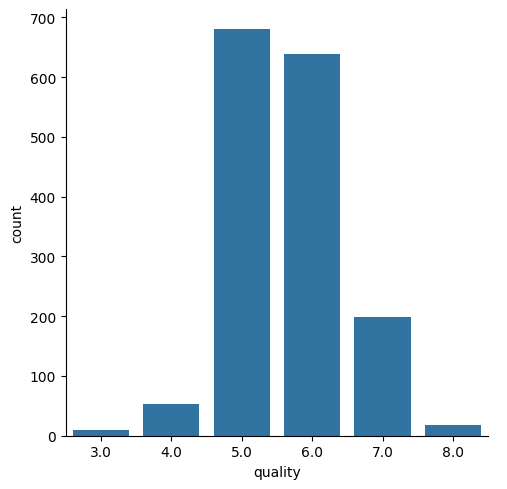

In [14]:
# number of values for each quality
sns.catplot(x="quality", data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

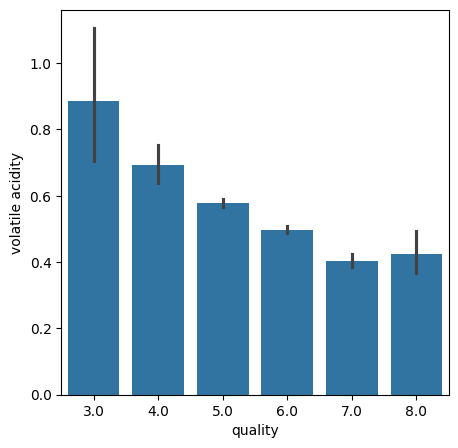

In [15]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

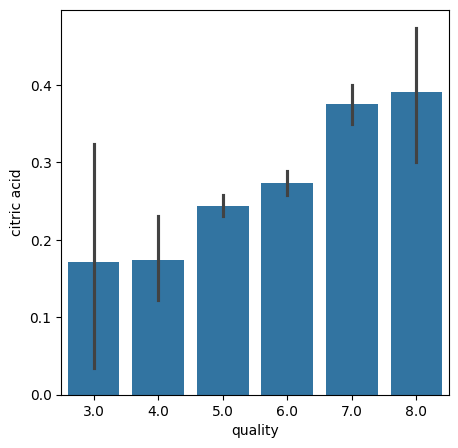

In [16]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y = 'citric acid', data = wine_dataset)

Correlation

1.Positive Correlation
2.Negative Correlation



In [18]:
Correlation = wine_dataset.corr()

<Axes: >

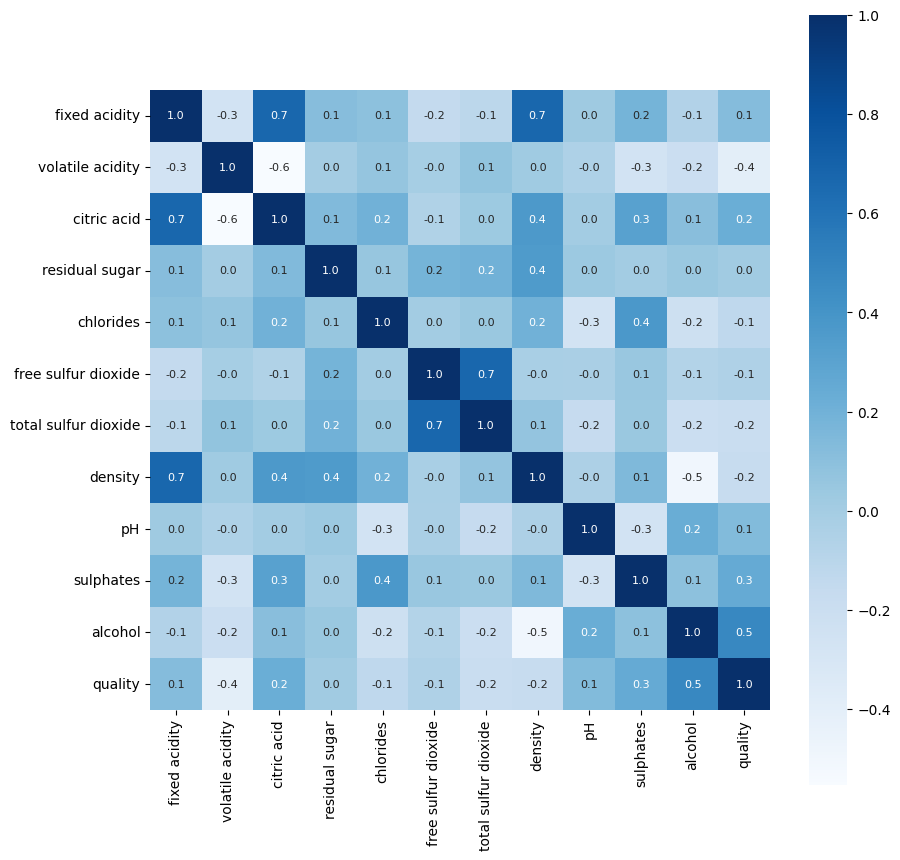

In [19]:
# constructing a heatmap to understand the Correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(Correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Data PreProcessing

In [20]:
# separte the data and Label
x = wine_dataset.drop('quality',axis=1)

In [21]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [22]:
y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [23]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [25]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


Model Training:
1.Random Forest Classifier  




In [26]:
# Import the RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model
Model = RandomForestClassifier()

In [28]:
# Fit the model with the training data
Model.fit(x_train, y_train)
print("Random Forest model trained successfully ✅")

Random Forest model trained successfully ✅


Model Evaluation

Accuracy score

In [29]:
# accuracy on test data
x_test_prediction = Model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

Building a Predictive System

In [32]:
import pandas as pd

# input data
input_data = (7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10)
# convert input data to DataFrame with SAME columns
input_df = pd.DataFrame([input_data], columns=x_train.columns)

# prediction
prediction = Model.predict(input_df)

print(prediction)

if prediction[0] == 1:
    print("Good Quality wine")
else:
    print("Bad Quality wine")


[1]
Good Quality wine
